# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [1]:
#Imports
import epidemics_helper
import json
import networkx as nx
from networkx.readwrite import json_graph

In [2]:
#Load data
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [7]:
DATA_DIR = './../data/'

G = read_json_file(f'{DATA_DIR}nyc_augmented_network.json')

In [10]:
#Start simulation
beta = 10.0
gamma = 0.1

sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)

1. Lauch outbreak

In [11]:
#Lauch outbreak
source = 23654
max_time = 100.0

sir.launch_epidemic(source=source, max_time=max_time)


Epidemic stopped after 102.10 days | 102.10 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


2. Plot the evolution of the epidemic over time

In [90]:
import numpy as np

In [201]:
from enum import Enum
import collections

class State(Enum):
    susceptible = 0
    infectious = 1
    recovered = 2

def calc_percentage_of_nodes_in_state(G, state):
    #state = State(f'state').value
    days = np.arange(int(max_time))
    nodes = []
    for i in days:
        node_states = [sir.get_node_status(node, i) for node in sir.G.nodes()]
        collection = collections.Counter(node_states)
        #collection = sorted(collection.items())
        collection = dict(sorted(collection.items(),key = lambda i: i[0], reverse=False))
        #print(i, collection)
        nodes.append(collection)
        #state, count = zip(*collection.items())
        #print(i, state, count)
    return days, nodes
        

days, nodes = calc_percentage_of_nodes_in_state(G, 2)
nodes[0].get(2)

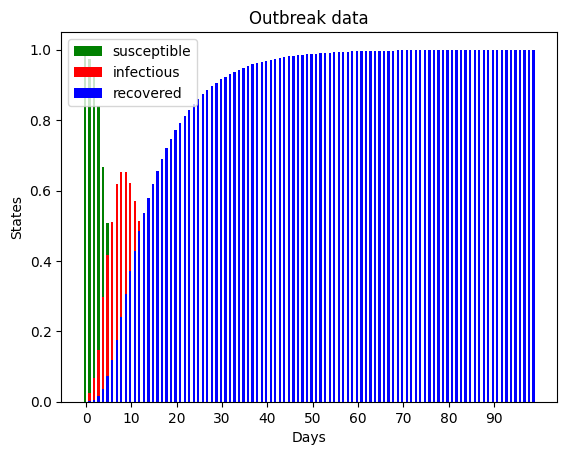

In [92]:
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N) 
width = 0.5
  
xvals = np.array([node.get(0) if node.get(0) is not None else 0 for node in nodes]) / len(sir.G.nodes())
bar1 = plt.bar(days, xvals, width, color = 'g')
  
yvals = np.array([node.get(1) if node.get(1) is not None else 0 for node in nodes]) / len(sir.G.nodes())
bar2 = plt.bar(days, yvals, width, color='r')
  
zvals = np.array([node.get(2) if node.get(2) is not None else 0 for node in nodes]) / len(sir.G.nodes())
bar3 = plt.bar(days, zvals, width, color = 'b')
  
plt.xlabel("Days")
plt.ylabel('States')
plt.title("Outbreak data")
  
plt.xticks(days[::10] + 0.25, days[::10])
plt.legend( (bar1, bar2, bar3), ('susceptible', 'infectious', 'recovered') )
plt.show()

3. a) How long until 60% of the population is infected (at the same time)?

In [97]:
yvals = np.array([node.get(1) if node.get(1) is not None else 0 for node in nodes]) / len(sir.G.nodes())
np.argmax(yvals > 0.6)

7

3. b)  How long until 60% of the population is recovered (at the same time)?

In [98]:
zvals = np.array([node.get(2) if node.get(2) is not None else 0 for node in nodes]) / len(sir.G.nodes())
np.argmax(zvals > 0.6)

15

4. Visualize the graph

In [165]:
def get_node_states(G, day):
    node_states = [sir.get_node_status(node, day) for node in sir.G.nodes()]
    return node_states

In [166]:
#pos0 = {city:(long, lat) for (city, (lat,long)) in nx.get_node_attributes(G, 'coordinates').items() if node_states[city] == 0}
#selected_nodes = [n for n,v in G.nodes(data=True) if node_states[n] == 0]
#H = G.subgraph(selected_nodes)
#nx.draw(H, pos0, with_labels=False, node_size=1)

#pos1 = {city:(long, lat) for (city, (lat,long)) in nx.get_node_attributes(G, 'coordinates').items() if node_states[city] == 1}
#selected_nodes = [n for n,v in G.nodes(data=True) if node_states[n] == 1]
#H1 = G.subgraph(selected_nodes)
#nx.draw(H1, pos1, with_labels=False, node_size=1, node_color=color_map)

def get_color_map(node_states):
    color_map = []
    for node in G:
        if node_states[node] == 0:
            color_map.append('green')
        elif node_states[node] == 1: 
            color_map.append('red')
        else:
            color_map.append('blue')
    return color_map

def draw_network(G, color_map):
    pos = {city:(long, lat) for (city, (lat,long)) in nx.get_node_attributes(G, 'coordinates').items()}
    nx.draw(G, pos, with_labels=False, node_size=1, node_color=color_map)

4. a) How does the graph look like on day 1?

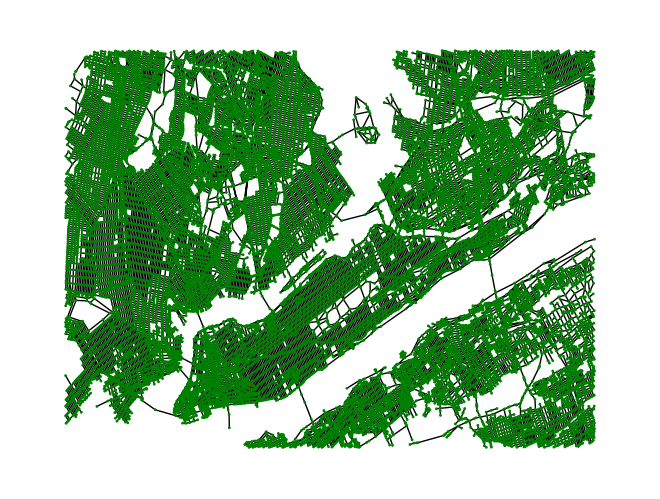

In [168]:
#day = 1
day = 0
node_states = get_node_states(G, day)
color_map = get_color_map(node_states)
draw_network(G, color_map)

4. b) How does the graph look like on day 3?

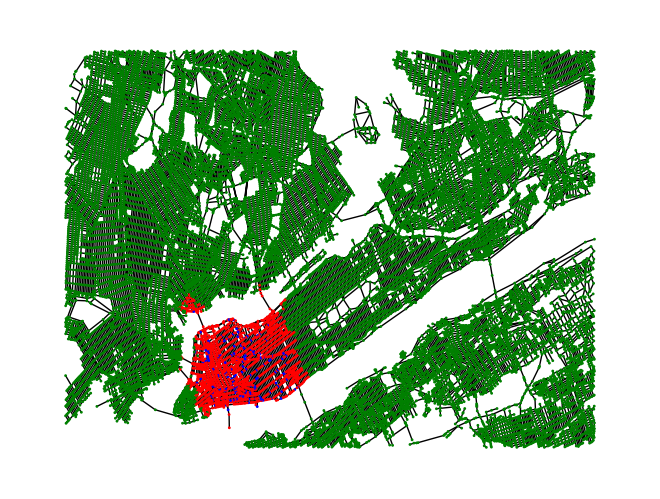

In [169]:
#day = 3
day = 2
node_states = get_node_states(G, day)
color_map = get_color_map(node_states)
draw_network(G, color_map)

4. c) How does the graph look like on day 30?

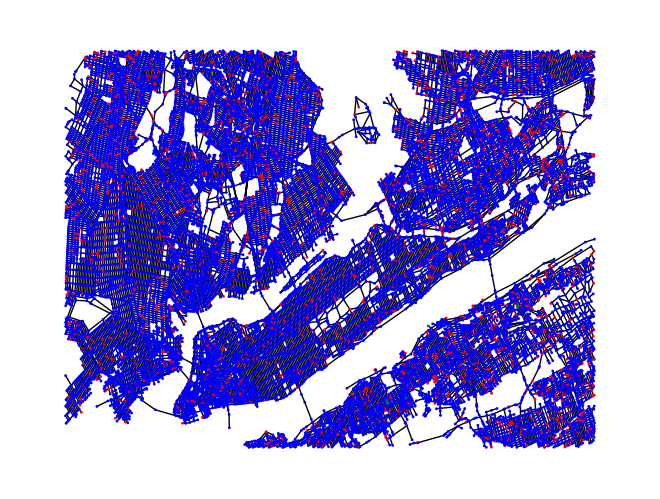

In [170]:
#day = 30
day = 29
node_states = get_node_states(G, day)
color_map = get_color_map(node_states)
draw_network(G, color_map)

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [198]:
from random import sample, choice
edges_budget = 1000

G = read_json_file(f'{DATA_DIR}nyc_augmented_network.json')

def remove_edges(G, edges_budget):
    random_edges = sample(G.edges(), edges_budget)
    G.remove_edges_from(random_edges)

In [199]:
beta = 10.0
gamma = 0.1

source = choice(range(len(G.nodes())))
max_time = 100.0

def simulate_outbreak(G, beta, gamma, source, max_time):
    sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)
    sir.launch_epidemic(source=source, max_time=max_time)
    return sir

Epidemic stopped after 106.72 days | 106.72 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


In [204]:
def get_outbrak_stats(G, day):
    node_states = get_node_states(G, day)
    collection = collections.Counter(node_states)
    collection = dict(sorted(collection.items(),key = lambda i: i[0], reverse=False))
    return collection

In [ ]:
def calc_avg_stats(collections):
    for 

In [ ]:
max_iter = 10
day = 29

susceptible = 0
infectious = 0
recovered = 0
for i in range(max_iter):
    source = choice(range(len(G.nodes())))
    simulate_outbreak(G, beta, gamma, source, max_time)
    col = get_outbrak_stats(G, day)
    col_val = list(col.items())
    susceptible += col.values()
    infectious, 
    recovered += col.values()

In [208]:
day = 29
node_states = get_node_states(G, day)
collection = collections.Counter(node_states)
collection = dict(sorted(collection.items(),key = lambda i: i[0], reverse=False))
print(collection.values(0))

TypeError: dict.values() takes no arguments (1 given)

#### Exercise 2.11: Strategy 2